# Carbon Dioxide Difference Analysis

We can infer the infiltration rate from the rate of carbon dioxide decrease.

$$ \frac{\Delta\ concentration}{\Delta t} \cdot 
   \frac{1}{outside\ concentration - inside\ concentration}$$

In [1]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('Indoor_3-3-2016.csv', 
                   skiprows=3,       # ignore the first 3 rows of data
                   sep=';',          # semicolon is used to separate data values
                   index_col=1,      # use column 1 as the dates to index the data
                   parse_dates=True) # convert the date string into a date object
data.head()

Timestamp  Temperature  Humidity  CO2  Noise  \
Timezone : America/Los_Angeles                                                  
2016-02-22 08:15:00             1456157700         19.4        52  410     40   
2016-02-22 08:45:00             1456159500         19.4        52  408     40   
2016-02-22 09:15:00             1456161300         19.6        52  416     40   
2016-02-22 09:45:00             1456163100         19.6        52  428     43   
2016-02-22 10:15:00             1456164900         19.7        52  441     39   

                                Pressure  
Timezone : America/Los_Angeles            
2016-02-22 08:15:00               1020.4  
2016-02-22 08:45:00               1020.1  
2016-02-22 09:15:00               1020.0  
2016-02-22 09:45:00               1019.9  
2016-02-22 10:15:00               1019.8

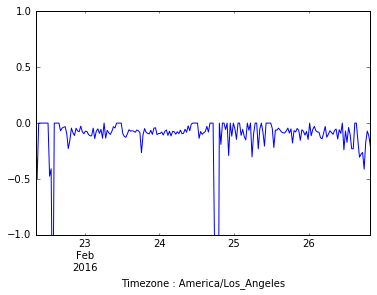

In [11]:
inside_concentration = data['CO2']
concentration_slope = data['CO2'].diff()/data['Timestamp'].diff()
concentration_slope = concentration_slope.where(concentration_slope<0, 0)
infiltration_rate = concentration_slope/(inside_concentration - 400.)*3600

ax = infiltration_rate.plot()
ax.set_ylim((-1,1))
ax.grid()
data['CO2'].plot()

In [3]:
infiltration_rate.describe()

count    216.000000
mean      -0.122748
std        0.309181
min       -3.177570
25%       -0.106454
50%       -0.073708
75%       -0.038764
max        0.000000
dtype: float64

TypeError: bad operand type for unary -: 'AxesSubplot'

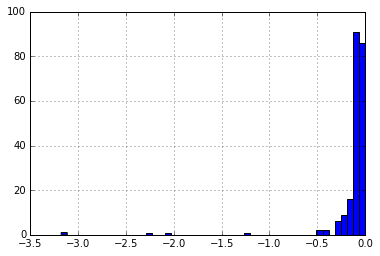

In [12]:
infiltration_rate.hist(bins=50)


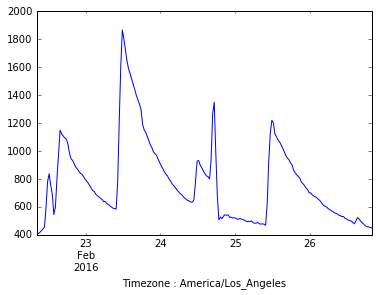

In [5]:
data['CO2'].plot()

In [6]:
time2 = '2016-02-23 12:15:00'
time1 = '2016-02-23 12:45:00'
rise = data['CO2'][time2] - data['CO2'][time1]
run = (data['Timestamp'][time2] - data['Timestamp'][time1])


print(data['CO2'][time2])
print(rise)
print('run =',run)
print('slope =', rise/run)
rise / run * 3600 / (data['CO2'][time2]-400)

1802
79
run = -1800
slope = -0.0438888888889


-0.11269614835948645

In [7]:
time2 = '2016-02-24 05:00:00'
time1 = '2016-02-24 07:00:00'

data[time2:time1]

Timestamp  Temperature  Humidity  CO2  Noise  \
Timezone : America/Los_Angeles                                                  
2016-02-24 05:15:00             1456319700         19.4        55  722     36   
2016-02-24 05:45:00             1456321500         19.3        55  710     37   
2016-02-24 06:15:00             1456323300         19.3        55  696     37   
2016-02-24 06:45:00             1456325100         19.2        54  687     37   

                                Pressure  
Timezone : America/Los_Angeles            
2016-02-24 05:15:00               1015.2  
2016-02-24 05:45:00               1015.3  
2016-02-24 06:15:00               1015.6  
2016-02-24 06:45:00               1015.8

In [8]:
time2 = '2016-02-24 05:45:00'
time1 = '2016-02-24 06:15:00'

rise = data['CO2'][time2] - data['CO2'][time1]
run = (data['Timestamp'][time2] - data['Timestamp'][time1])


print(data['CO2'][time2])
print(rise)
print('run =', run)
print('slope =', rise/run)
rise / run * 3600 / (data['CO2'][time2]-400)

710
14
run = -1800
slope = -0.00777777777778


-0.090322580645161285

In [9]:
time2 = '2016-02-23 09:15:00'
time1 = '2016-02-23 08:45:00'
rise = data['CO2'][time2] - data['CO2'][time1]
run = (data['Timestamp'][time2] - data['Timestamp'][time1])

rise/run

-0.0016666666666666668